# **Introduction**
Unemployment is a key economic indicator, reflecting the number of unemployed individuals as a percentage of the total labor force. During the COVID-19 pandemic, India experienced a significant rise in unemployment rates. This project analyzes unemployment trends across different states and Union Territories (UTs) in India, providing insights through data visualizations and predictive modeling.

### **Objectives:**
- Analyze unemployment trends using historical data.
- Visualize key patterns across different regions and time periods.
- Build a predictive model to estimate unemployment rates.

# Importing Libraries & Loading the Dataset

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("Unemployment in India.csv")

print("Dataset Shape:", dataset.shape)  # Number of rows and columns
print(dataset.head())  # Display first 5 rows

# Check for missing values
print("\nMissing Values in Each Column:")
print(dataset.isnull().sum())  # Count of missing values per column


Dataset Shape: (754, 7)
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Missing Values in Each Column:
Region                   

# Exploratory Data Analysis (EDA)

In [3]:
# Clean column names (remove extra spaces)
dataset.columns = dataset.columns.str.strip()

# Summary Statistics for numeric columns
print(dataset.describe())

       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000  


# Visualizations

Distribution of Estimated Unemployment Rate (%)

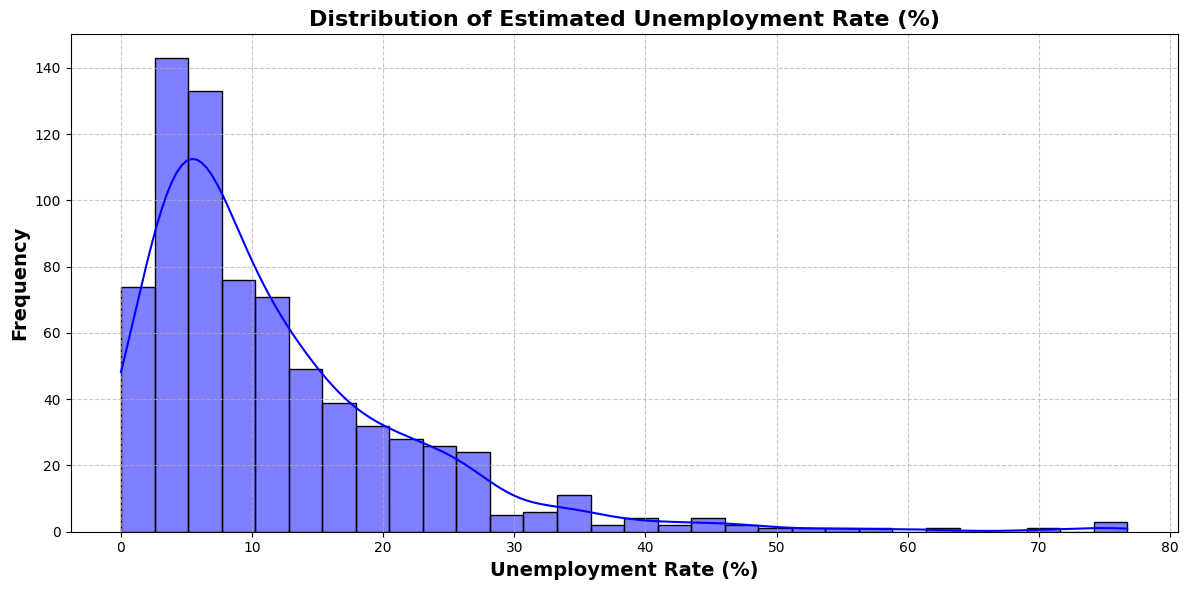

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset['Estimated Unemployment Rate (%)'], kde=True, color='blue', bins=30)
plt.title("Distribution of Estimated Unemployment Rate (%)", fontsize=16, fontweight='bold')
plt.xlabel("Unemployment Rate (%)", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribution of Estimated Employed

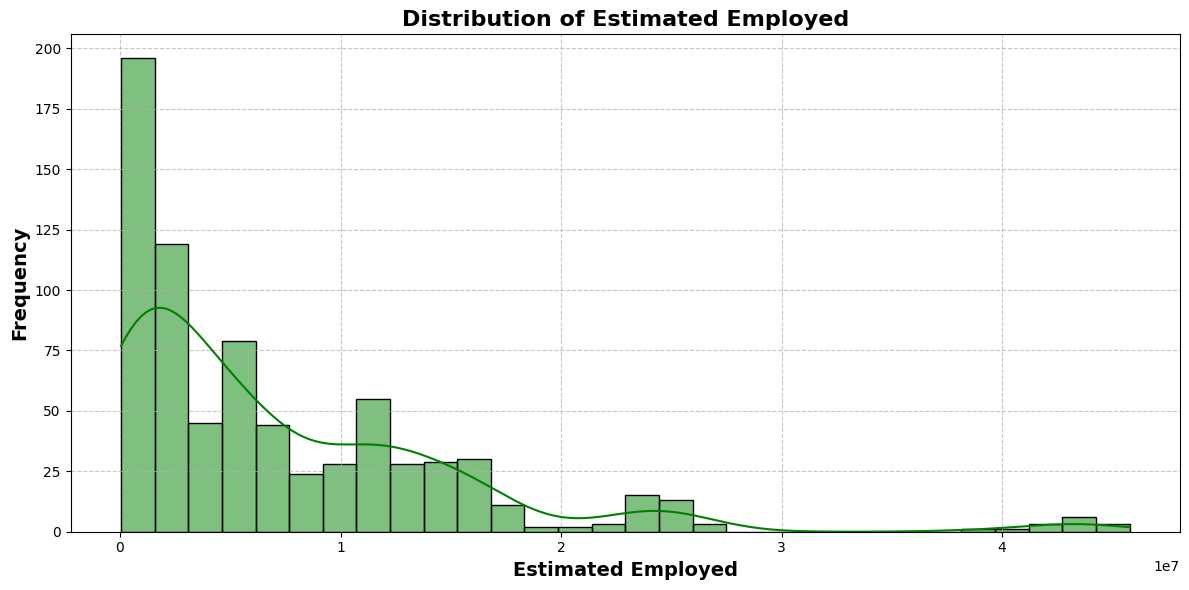

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(dataset['Estimated Employed'], kde=True, color='green', bins=30)
plt.title("Distribution of Estimated Employed", fontsize=16, fontweight='bold')
plt.xlabel("Estimated Employed", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Trend of Unemployment Rate over time

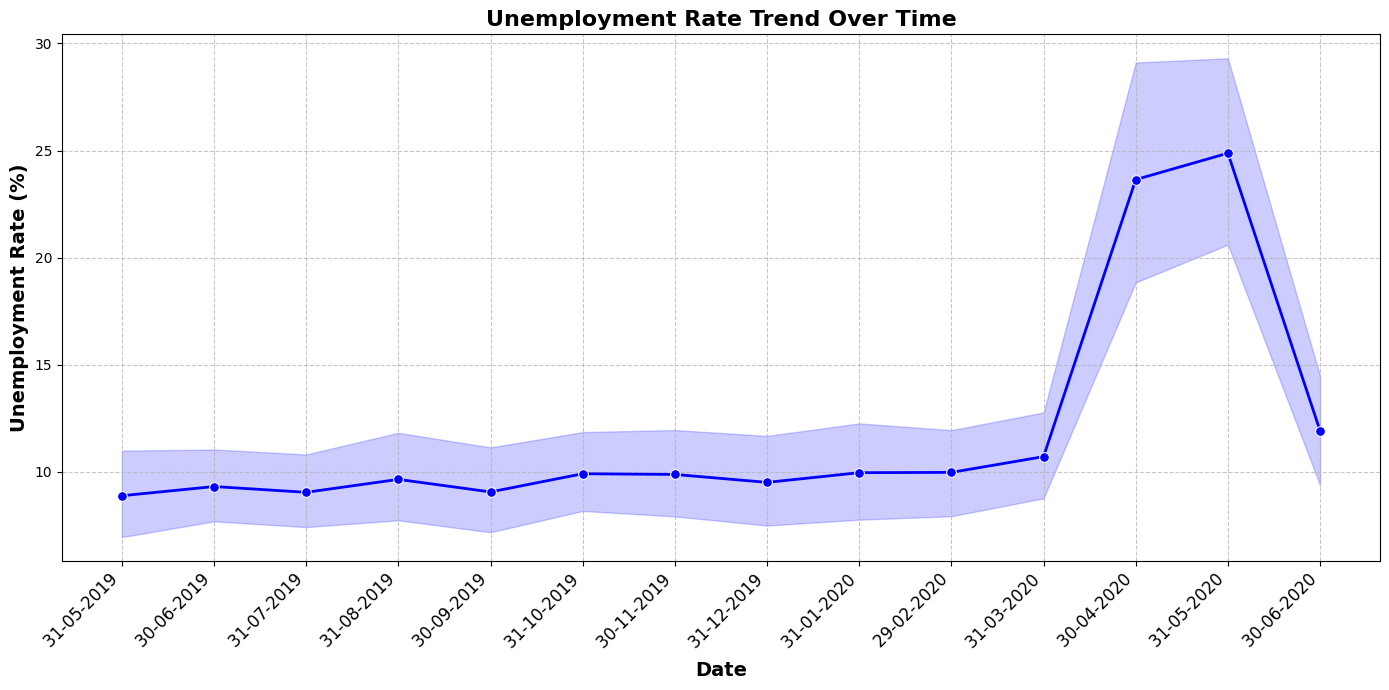

In [6]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=dataset,
             color='blue', marker='o', linewidth=2, markersize=7)
plt.title("Unemployment Rate Trend Over Time", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=14, fontweight='bold')
plt.ylabel("Unemployment Rate (%)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Boxplot of Unemployment Rate by Region

<ipython-input-7-4211e02b54f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=dataset,


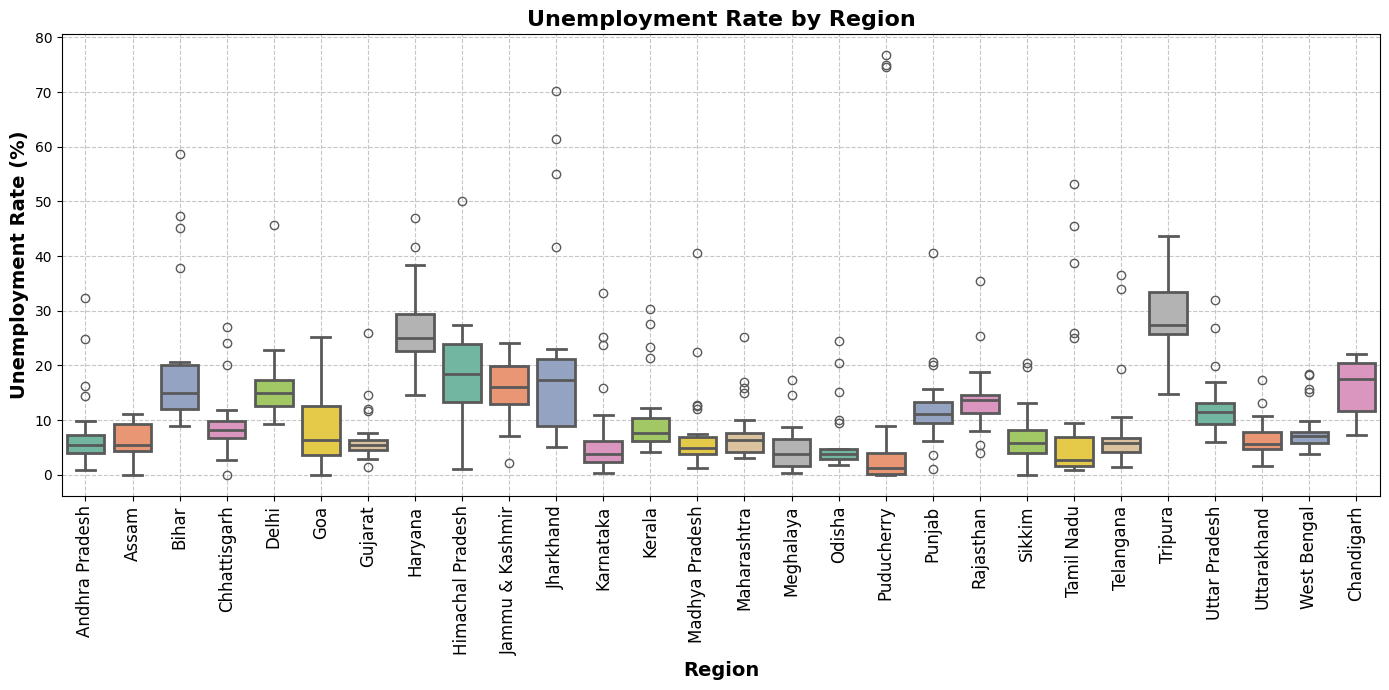

In [7]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=dataset,
            palette='Set2', linewidth=2)
plt.title("Unemployment Rate by Region", fontsize=16, fontweight='bold')
plt.xlabel("Region", fontsize=14, fontweight='bold')
plt.ylabel("Unemployment Rate (%)", fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Visualize the distribution of categorical columns like 'Region'

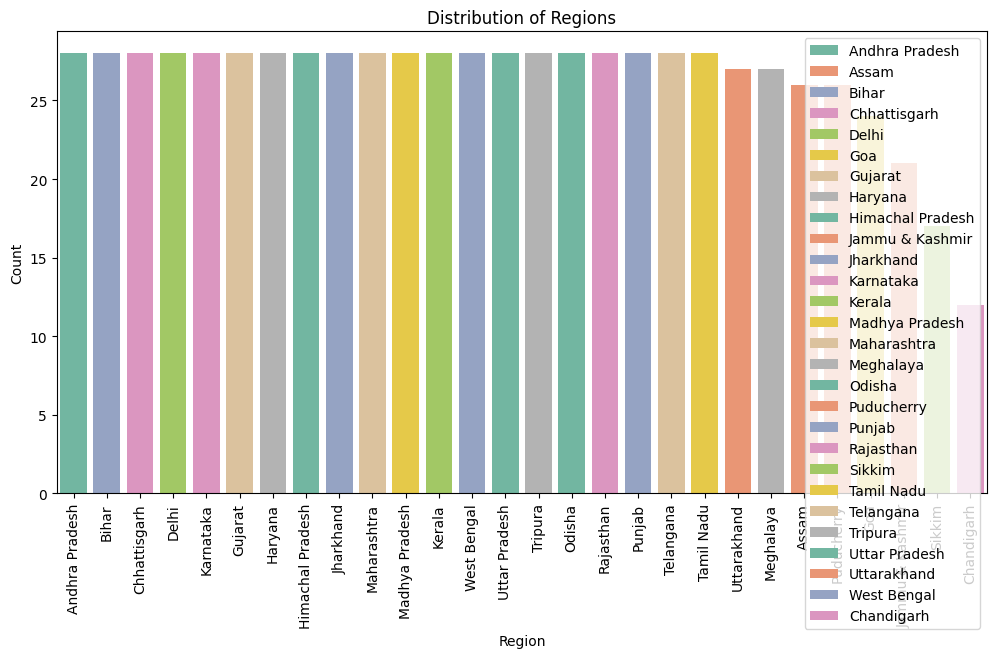

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Region', palette="Set2", hue='Region', order=dataset['Region'].value_counts().index)
plt.legend(loc='upper right')
plt.title("Distribution of Regions")
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

Display dataset shape and info after preprocessing

In [11]:
print("\nDataset shape after preprocessing:", dataset.shape)
print("\nDataset info:")
print(dataset.info())


Dataset shape after preprocessing: (754, 7)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB
None


# Model Training and Evaluation

Gradient Boosting Model Evaluation:
Mean Absolute Error (MAE): 3.6159585371432352
Mean Squared Error (MSE): 29.610051755436594
Root Mean Squared Error (RMSE): 5.441511899779012
R² Score: 0.6616181249337264


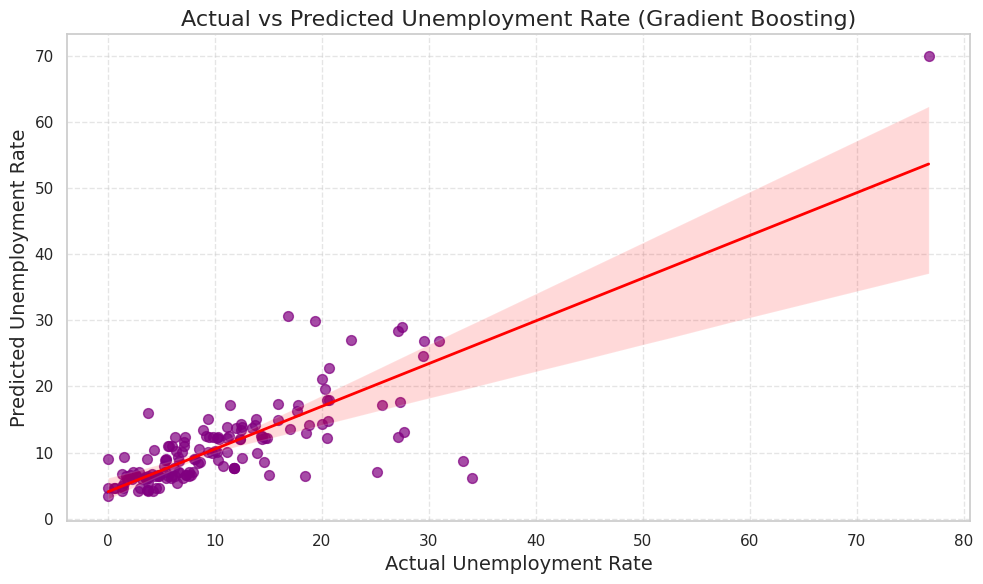

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Model Evaluation:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_gb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R² Score:", r2_score(y_test, y_pred_gb))

import matplotlib.pyplot as plt
import seaborn as sns

# Plot Actual vs Predicted values for Gradient Boosting
plt.figure(figsize=(10, 6))

# Scatter plot with a regression line (optional)
sns.regplot(x=y_test, y=y_pred_gb, scatter_kws={'color': 'purple', 's': 50, 'alpha': 0.7}, line_kws={'color': 'red', 'linewidth': 2})

# Set the title and labels
plt.title("Actual vs Predicted Unemployment Rate (Gradient Boosting)", fontsize=16)
plt.xlabel("Actual Unemployment Rate", fontsize=14)
plt.ylabel("Predicted Unemployment Rate", fontsize=14)

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


# Model Interpretation & Feature Importance

<ipython-input-30-c2f04619aad4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


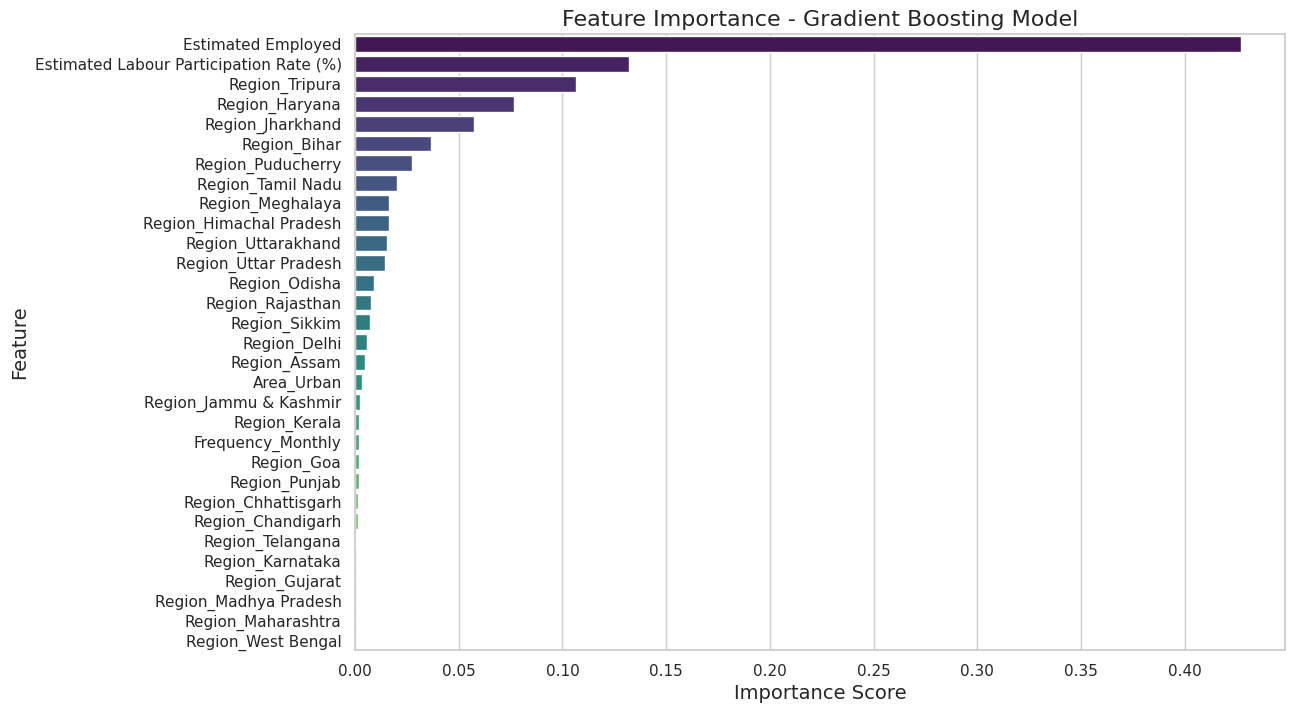

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
feature_importances = gb_model.feature_importances_
features = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Set Seaborn style for better visualization
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')

# Adding labels and title
plt.title("Feature Importance - Gradient Boosting Model", fontsize=16)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)

# Show the plot
plt.show()


# **Conclusion**

In this project, we analyzed the unemployment data in India to predict the Estimated Unemployment Rate using various machine learning models. The objective was to understand the trends in unemployment and to evaluate which model performed best in predicting this important metric.

We began by exploring the dataset, cleaning it, and preprocessing the data by handling missing values and encoding categorical variables. After that, we split the data into training and testing sets to ensure our models were evaluated on unseen data.

Several models were trained and evaluated:



*   Linear Regression
*   Random Forest
*   Gradient Boosting
*   SVR (Support Vector Regression)
*   K-Nearest Neighbors (KNN)


Among these models, Gradient Boosting yielded the highest R² score of 0.66, indicating it explained 66% of the variance in the unemployment rate. It also showed promising results with a lower MAE and MSE compared to other models.


**Key Findings:**

*   The Random Forest model and Gradient Boosting provided good predictions with a relatively higher R² score than other models.


*   The Support Vector Regression (SVR) and KNN models had lower performance, suggesting they might not be the best fit for this problem.


*   The R² score for the best models (Gradient Boosting and Random Forest) indicates a moderate fit, meaning the models can reasonably predict the unemployment rate but there is still room for improvement.


Overall, the project provides a solid foundation for predicting unemployment trends and demonstrates the importance of selecting the right model for the task at hand. Further refinements could be made to improve prediction accuracy, especially with more data or advanced techniques.